In [1]:
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import copy
import pandas as pd

np.random.seed(17)

nb_patterns = 11
pattern_width = 5
pattern_height = 5
max_iterations = 10

def invert_list(lst, chance=0.2):
    return np.array([[(-1 if x == 1 else 1) if np.random.rand() < chance else x for x in inner_lst] for inner_lst in lst])

Coord = [[0, 0], [0, 1], [0, 2], [0, 3],
         [1, 0], [1, 1], [1, 2], [1, 3],
         [2, 0], [2, 1], [2, 2], [2, 3],
         [3, 0], [3, 1], [3, 2], [3, 3]]


In [2]:
I = np.array([  
                
                [ 1, 1, 1, -1, -1,
                  1, -1, -1, 1, -1,
                  1, -1, -1, 1, -1,
                  1, -1, -1, 1, -1,
                  1, 1, 1, 1, -1],#D

                [-1, -1, 1, -1, -1,   
                 -1, 1, -1, 1, -1,
                  1, -1, -1, -1, 1,
                  1, 1, 1, 1, 1,
                  1, -1, -1, -1, 1],#A

                [-1, 1, 1, -1, -1,
                 -1, 1, -1, 1, -1,
                 -1, 1, 1, -1, -1,
                 -1, 1, -1, 1, -1,
                - 1, 1, -1, 1, -1], #R

                [1, 1, 1, 1, 1,
                -1, -1, 1, -1, -1,
                -1, -1, 1, -1, -1,
                -1, -1, 1, -1, -1,
                 1, 1, 1, 1, 1], #I

                [-1, -1, 1, -1, -1,   
                 -1, 1, -1, 1, -1,
                  1, -1, -1, -1, 1,
                  1, 1, 1, 1, 1,
                  1, -1, -1, -1, 1],#A
        
                [-1, -1, -1, -1, -1,   
                 -1, -1, -1, -1, -1,
                 -1, -1, -1, -1, -1,
                 -1, -1, -1, -1, -1,
                 -1, -1, -1, -1, -1],#space

                [1, -1, -1, 1, -1,
                 1, -1, 1, -1, -1,
                 1, 1, -1, -1, -1,
                 1, -1, 1, -1, -1,
                 1, -1, -1, 1, -1], #K

                [1, 1, 1, 1, 1,
                -1, -1, 1, -1, -1,
                -1, -1, 1, -1, -1,
                -1, -1, 1, -1, -1,
                 1, 1, 1, 1, 1], #I

                [-1, -1, -1, -1, -1,
                 -1, -1, -1, -1, -1,
                 -1, -1, -1, -1, -1,
                  1, 1, 1, 1, 1,
                 -1, -1, -1, -1, -1], #-

                [1, 1, 1, 1, 1,
                 1, -1, -1, -1, 1,
                 1, -1, -1, -1, 1,
                 1, -1, -1, -1, 1,
                 1, 1, 1, 1, 1], #0

                 [1, 1, 1, 1, 1,
                 -1, -1, -1, -1, 1,
                  1, 1, 1, 1, 1,
                  1, -1, -1, -1, -1,
                  1, 1, 1, 1, 1], #2
                  ])

   2 changes  4 changes  6 changes
D       True       True       True
A       True       True       True
R       True       True       True
I       True       True       True
A       True       True       True
       False      False      False
K       True       True       True
I       True       True       True
-       True       True       True
0       True       True       True
2       True       True       True
f2 changes: 10 - correct | 1 - false | accuracy is 0.909
f4 changes: 10 - correct | 1 - false | accuracy is 0.909
f6 changes: 10 - correct | 1 - false | accuracy is 0.909


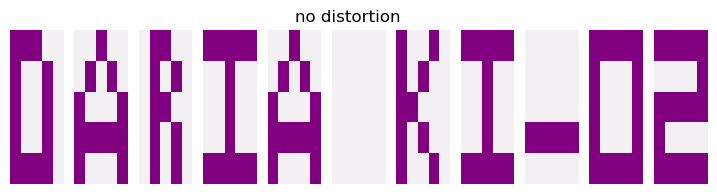

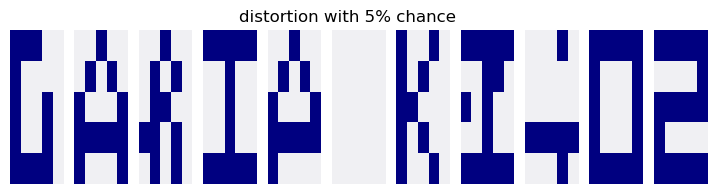

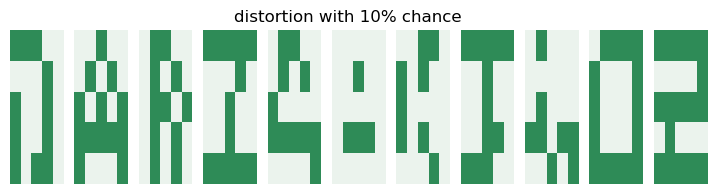

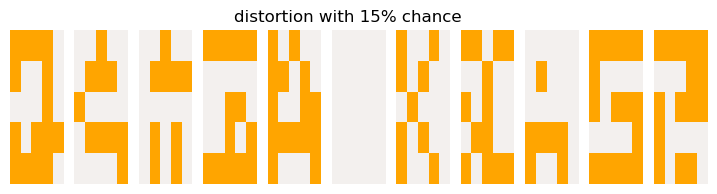

In [3]:

I2 = invert_list(I, chance=0.05)
I4 = invert_list(I, chance=0.1)
I6 = invert_list(I, chance=0.15)

fig, ax = plt.subplots(1, len(I), figsize = (9, 2))
fig.suptitle('no distortion')
for ii in range(len(I)):
    sns.heatmap(np.reshape(I[ii],(5,5)), cmap = sns.light_palette("purple"), ax=ax[ii], cbar=False, yticklabels=False, xticklabels=False)

fig, ax=plt.subplots(1, len(I2), figsize = (9, 2))
fig.suptitle(r'distortion with 5% chance')
for ii in range(len(I2)):
    sns.heatmap(np.reshape(I2[ii], (5,5)), cmap = sns.light_palette("navy"), ax=ax[ii], cbar=False, yticklabels=False, xticklabels=False)
    
fig, ax=plt.subplots(1, len(I4), figsize = (9, 2))
fig.suptitle(r'distortion with 10% chance')
for ii in range(len(I4)):
    sns.heatmap(np.reshape(I4[ii], (5,5)), cmap = sns.light_palette("seagreen"), ax=ax[ii], cbar=False, yticklabels=False, xticklabels=False)
    
fig, ax=plt.subplots(1, len(I6), figsize = (9, 2))
fig.suptitle(r'distortion with 15% chance')
for ii in range(len(I6)):
    sns.heatmap(np.reshape(I6[ii], (5,5)), cmap = sns.light_palette("orange"), ax=ax[ii], cbar=False, yticklabels=False, xticklabels=False)
    
W = np.zeros((pattern_width * pattern_height, pattern_width * pattern_height))

for i in range(pattern_width * pattern_height):
    for j in range(pattern_width * pattern_height):
        if i == j or W[i, j] != 0.0:
            continue

w = 0.0

for n in range(nb_patterns):
    w += I[n][i] * I[n][j]
    
W[i, j] = w / I.shape[0]
W[j, i] = W[i, j]

er2 = []
er4 = []
er6 = []

for ii in range(len(I)):
    x_test = I2[ii]
    A = x_test.copy()
    
    for _ in range(max_iterations):
        for i in range(pattern_width * pattern_height):
            A[i] = 1.0 if np.dot(W[i], A) > 0 else -1.0
            
    truth_list = (A==I[ii])
    
    if (False in truth_list):
        er2.append(1)
    else:
        er2.append(0)
        
for ii in range(len(I)):
    x_test = I4[ii]
    A = x_test.copy()
    
    for _ in range(max_iterations):
        for i in range(pattern_width * pattern_height):
            A[i] = 1.0 if np.dot(W[i], A) > 0 else -1.0
            
    truth_list = (A==I[ii])
    
    if (False in truth_list):
        er4.append(1)
    else:
        er4.append(0)
        
for ii in range(len(I)):
    x_test = I6[ii]
    A = x_test.copy()
    
    for _ in range(max_iterations):
        for i in range(pattern_width * pattern_height):
            A[i] = 1.0 if np.dot(W[i], A) > 0 else -1.0
            
    truth_list = (A==I[ii])
    
    if (False in truth_list):
        er6.append(1)
    else:
        er6.append(0)
        
letters = ['D','A','R','I','A','','K','I','-','0','2']

df = pd.DataFrame(list(zip(er2, er4, er6)), columns =['2 changes', '4 changes', '6 changes'], index = letters)
for col in df.columns:
    df[col] = df[col].map({1: True, 0: False})

print(df)
print(f'f2 changes: {er2.count(1)} - correct | {er2.count(0)} - false | accuracy is {er2.count(1)/11:.3f}')
print(f'f4 changes: {er4.count(1)} - correct | {er4.count(0)} - false | accuracy is {er4.count(1)/11:.3f}')
print(f'f6 changes: {er6.count(1)} - correct | {er6.count(0)} - false | accuracy is {er6.count(1)/11:.3f}')
